## AWS Calibrations to Qiskit Target

This notebook shows how to:

* Download Calibrations for AWS Braket devices
* Convert AWS Calibrations to Standard Calibrations
* Convert Standard Calibrations to Qiskit Target
* Use Target to Plot Error Map
* Use Target for Noisy Simulation

### Imports

#### Qiskit

In [1]:
import qiskit

from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_gate_map

#### AWS

In [2]:
# pip install amazon-braket-sdk
# pip install qiskit-braket-provider

In [3]:
from braket.aws import AwsDevice
from qiskit_braket_provider.providers import AWSBraketBackend

#### General

In [4]:
import numpy as np

from matplotlib import pyplot as plt

plt.style.use("dark_background")

#### Rivet

In [5]:
%cd ../..

from rivet_transpiler.calibrations import get_standard_calibrations
from rivet_transpiler.calibrations import get_target_from_calibrations

from rivet_transpiler.calibrations import ASPEN_M3_ARN
from rivet_transpiler.calibrations import ASPEN_M3_SCHEME
from rivet_transpiler.calibrations import ASPEN_M3_NATIVE_GATES
from rivet_transpiler.calibrations import get_aspen_m3_coordinates

from rivet_transpiler.calibrations import LUCY_ARN
from rivet_transpiler.calibrations import LUCY_SCHEME
from rivet_transpiler.calibrations import LUCY_NATIVE_GATES
from rivet_transpiler.calibrations import LUCY_COORDINATES

/mnt/c/Users/mohor/Jupyter/Haiqu/transpiler


### Load Calibrations

#### OQC Lucy

In [6]:
# AWS Braket Backend

lucy_aws_device = AwsDevice(LUCY_ARN)

lucy_backend = AWSBraketBackend(device=lucy_aws_device, name="Lucy")

lucy_backend

BraketBackend[Lucy]

In [7]:
# Calibrations

lucy_calibrations = lucy_aws_device.properties.provider.properties

In [8]:
# Save Calibrations

np.save(
    "examples/calibrations/calibrations/lucy_calibrations.npy",
    lucy_calibrations)

lucy_calibrations = np.load(
    "examples/calibrations/calibrations/lucy_calibrations.npy",
    allow_pickle=True).item()

lucy_calibrations

{'one_qubit': {'0': {'T1': 24.886750393070763,
   'T2': 26.07078283012027,
   'fRB': 0.9990355252411796,
   'fRO': 0.9375,
   'qubit': 0.0},
  '1': {'T1': 40.44014476479826,
   'T2': 55.91033444394357,
   'fRB': 0.9975512733547407,
   'fRO': 0.785,
   'qubit': 1.0},
  '2': {'T1': 68.39669261912181,
   'T2': 47.79358122318605,
   'fRB': 0.9983774960823968,
   'fRO': 0.839,
   'qubit': 2.0},
  '3': {'T1': 38.35350091178702,
   'T2': 48.79386221328369,
   'fRB': 0.9995368869304959,
   'fRO': 0.8855,
   'qubit': 3.0},
  '4': {'T1': 49.88266465156773,
   'T2': 17.299593188743422,
   'fRB': 0.999960994383878,
   'fRO': 0.85,
   'qubit': 4.0},
  '5': {'T1': 29.788893032910853,
   'T2': 36.41785637197371,
   'fRB': 0.9992219561013342,
   'fRO': 0.9365,
   'qubit': 5.0},
  '6': {'T1': 21.367425654930187,
   'T2': 17.669532960879607,
   'fRB': 0.999346085343995,
   'fRO': 0.919,
   'qubit': 6.0},
  '7': {'T1': 36.12647844676217,
   'T2': 32.35892320572333,
   'fRB': 0.9836323789271717,
   'fRO':

#### Rigetti Aspen-M-3

In [9]:
# AWS Braket Backend

aspen_m3_aws_device = AwsDevice(ASPEN_M3_ARN)

aspen_m3_backend = AWSBraketBackend(device=aspen_m3_aws_device, name="Aspen-M-3")

aspen_m3_backend

BraketBackend[Aspen-M-3]

In [10]:
# Calibrations

aspen_m3_calibrations = aspen_m3_aws_device.properties.provider.specs

In [11]:
# Save Calibrations

np.save(
    "examples/calibrations/calibrations/aspen_m3_calibrations.npy", 
    aspen_m3_calibrations)

aspen_m3_calibrations = np.load(
    "examples/calibrations/calibrations/aspen_m3_calibrations.npy", 
    allow_pickle=True).item()

# aspen_m3_calibrations

### Schemes

Above Calibrations from AWS Braket contain device-specific key names and structure.

For each device we can use particular scheme to parse AWS Calibrations into Standard Calibrations.

In [12]:
LUCY_SCHEME

{'one_qubit_section_name': 'one_qubit',
 'two_qubit_section_name': 'two_qubit',
 'gate_fidelity_name': 'fRB',
 'readout_fidelity_name': 'fRO',
 'two_qubit_fidelities': {'fCX': 'cx'},
 't1_name': 'T1',
 't2_name': 'T2',
 't1_time_unit': 1e-06,
 't2_time_unit': 1e-06,
 'duration_1q_seconds': 5.0000000000000004e-08,
 'duration_2q_seconds': 1.0000000000000002e-06,
 'qubit_frequency_hz': None}

In [13]:
ASPEN_M3_SCHEME

{'one_qubit_section_name': '1Q',
 'two_qubit_section_name': '2Q',
 'gate_fidelity_name': 'f1QRB',
 'readout_fidelity_name': 'fRO',
 'two_qubit_fidelities': {'fCZ': 'cz', 'fCPHASE': 'cphase', 'fXY': 'xy'},
 't1_name': 'T1',
 't2_name': 'T2',
 't1_time_unit': 1,
 't2_time_unit': 1,
 'duration_1q_seconds': 4e-08,
 'duration_2q_seconds': 2.4000000000000003e-07,
 'qubit_frequency_hz': None}

### Convert Calibrations to Target

To convert AWS Calibrations to Qiskit Target - we first convert AWS Calibrations to Standard Calibrations:

In [14]:
lucy_standard_calibrations = get_standard_calibrations(
    calibrations=lucy_calibrations, 
    scheme=LUCY_SCHEME)

# lucy_standard_calibrations

In [15]:
aspen_m3_standard_calibrations = get_standard_calibrations(
    calibrations=aspen_m3_calibrations, 
    scheme=ASPEN_M3_SCHEME)

# aspen_m3_standard_calibrations

And then - Convert Standard Calibrations to Target:

In [16]:
lucy_target = get_target_from_calibrations(
    calibrations=lucy_standard_calibrations,
    target_instructions=lucy_backend.operations
)

# print(lucy_target)

In [17]:
aspen_m3_target = get_target_from_calibrations(
    calibrations=aspen_m3_standard_calibrations,
    target_instructions=aspen_m3_backend.operations
)

# print(aspen_m3_target)

### Plot Error Map

Target can be used to Plot Error Map for a Backend:

#### Update Lucy Target

In [18]:
lucy_backend._target = lucy_target

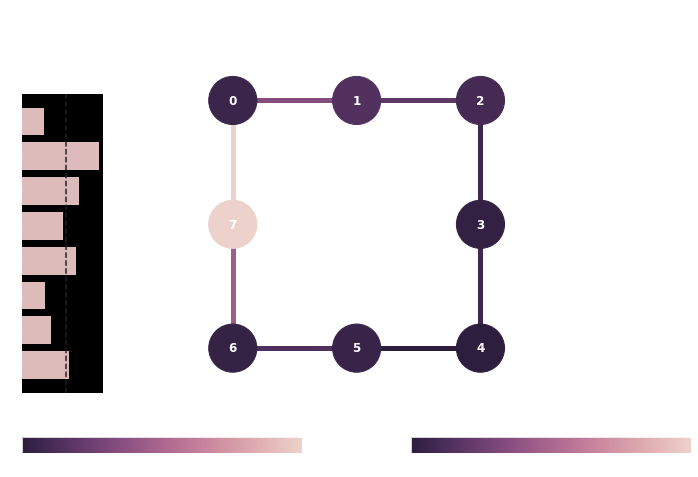

In [19]:
qiskit.visualization.plot_error_map(
    lucy_backend,
    figsize=(12, 8),
    # show_title=False,
    qubit_coordinates=LUCY_COORDINATES
)

#### Update Aspen-M-3 Target

In [20]:
aspen_m3_backend._target = aspen_m3_target

In [21]:
aspen_m3_coordinates = get_aspen_m3_coordinates()

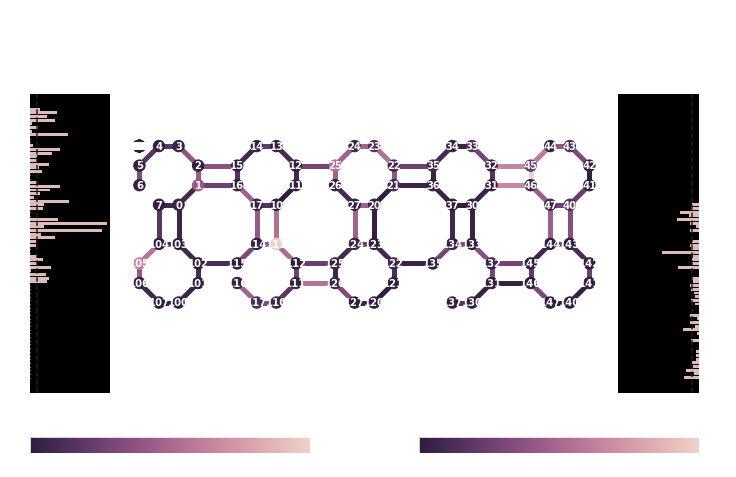

In [22]:
qiskit.visualization.plot_error_map(
    aspen_m3_backend,
    figsize=(12, 8),
    # figsize=(18, 24),
    # show_title=False,
    qubit_coordinates=aspen_m3_coordinates
)

## Use Target for Noisy Simulators

Finally, we transpile and run 3-qubit GHZ circuit on noisy simulators of Lucy and Aspen-M-3 backends.

Qiskit Noise Model is built under-the-hood by `AerSimulator.from_backend` function. 

#### GHZ Circuit

In [23]:
QUBITS_COUNT = 3
SHOTS_COUNT = 1000

ghz_circuit = qiskit.QuantumCircuit(QUBITS_COUNT)

ghz_circuit.h(0)

for qubit in range(QUBITS_COUNT - 1):
    ghz_circuit.cx(qubit, qubit + 1)
    
ghz_circuit.measure_all()

print(ghz_circuit)

        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 


### Run on Lucy Simulator

In [24]:
lucy_noisy_simulator = AerSimulator.from_backend(lucy_backend)

#### Transpile

In [25]:
lucy_transpiled_ghz_circuit = qiskit.transpile(
    ghz_circuit,
    backend=lucy_noisy_simulator,
    basis_gates=LUCY_NATIVE_GATES,
    seed_transpiler=1234
)

lucy_transpiled_ghz_circuit.draw(fold=-1, idle_wires=False)

global phase: 5π/4
         ┌─────────┐┌────┐          ┌──────┐   ┌───┐                  ░ ┌─┐      
q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├──────────┤0     ├───┤ X ├──────────────────░─┤M├──────
         └┬────────┤├────┤┌────────┐│  Ecr │┌──┴───┴───┐┌──────┐┌───┐ ░ └╥┘┌─┐   
q_1 -> 1 ─┤ Rz(-π) ├┤ √X ├┤ Rz(-π) ├┤1     ├┤ Rz(-π/2) ├┤0     ├┤ X ├─░──╫─┤M├───
          ├────────┤├────┤├────────┤└──────┘└──────────┘│  Ecr │└───┘ ░  ║ └╥┘┌─┐
q_2 -> 2 ─┤ Rz(-π) ├┤ √X ├┤ Rz(-π) ├────────────────────┤1     ├──────░──╫──╫─┤M├
          └────────┘└────┘└────────┘                    └──────┘      ░  ║  ║ └╥┘
 meas: 3/════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                         0  1  2

#### Run

In [26]:
job = lucy_noisy_simulator.run(
    lucy_transpiled_ghz_circuit, 
    shots=SHOTS_COUNT, 
    seed_simulator=1234
)

lucy_counts = job.result().get_counts()

#### Plot Results

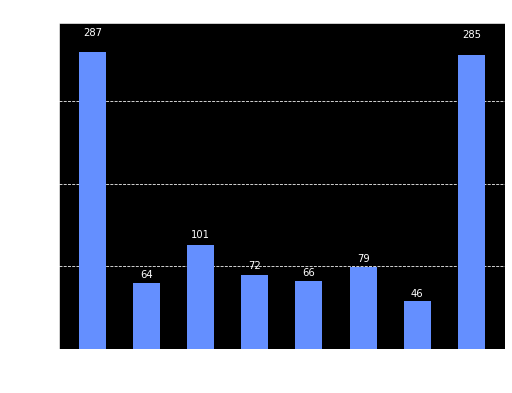

In [27]:
qiskit.visualization.plot_histogram(
    lucy_counts,
    title="3-qubit GHZ on OQC Lucy topology",
    figsize=(8, 6))

### Run on Aspen-M-3 Simulator

In [28]:
aspen_m3_noisy_simulator = AerSimulator.from_backend(aspen_m3_backend)

#### Transpile

In [29]:
aspen_m3_transpiled_ghz_circuit = qiskit.transpile(
    ghz_circuit,
    backend=aspen_m3_noisy_simulator,
    basis_gates=ASPEN_M3_NATIVE_GATES,
    seed_transpiler=1234
)

aspen_m3_transpiled_ghz_circuit.draw(fold=-1, idle_wires=False)

global phase: 3π/2
         ┌──────────┐┌──────────┐┌──────────┐                                                                               ░ ┌─┐      
q_0 -> 0 ┤ Rz(-π/2) ├┤ Rx(-π/2) ├┤ Rz(-π/2) ├─■─────────────────────────────────────────────────────────────────────────────░─┤M├──────
         ├──────────┤├──────────┤├──────────┤ │ ┌──────────┐┌──────────┐┌──────────┐                                        ░ └╥┘┌─┐   
q_1 -> 1 ┤ Rz(-π/2) ├┤ Rx(-π/2) ├┤ Rz(-π/2) ├─■─┤ Rz(-π/2) ├┤ Rx(-π/2) ├┤ Rz(-π/2) ├─■──────────────────────────────────────░──╫─┤M├───
         ├──────────┤├──────────┤├──────────┤   └──────────┘└──────────┘└──────────┘ │ ┌──────────┐┌──────────┐┌──────────┐ ░  ║ └╥┘┌─┐
q_2 -> 2 ┤ Rz(-π/2) ├┤ Rx(-π/2) ├┤ Rz(-π/2) ├────────────────────────────────────────■─┤ Rz(-π/2) ├┤ Rx(-π/2) ├┤ Rz(-π/2) ├─░──╫──╫─┤M├
         └──────────┘└──────────┘└──────────┘                                          └──────────┘└──────────┘└──────────┘ ░  ║  ║ └╥┘
 meas: 3/══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╩══╩══╩═
                                                                                                                               0  1  2

#### Run

In [30]:
job = aspen_m3_noisy_simulator.run(
    aspen_m3_transpiled_ghz_circuit, 
    shots=SHOTS_COUNT, 
    seed_simulator=1234
)

aspen_m3_counts = job.result().get_counts()

#### Plot Results

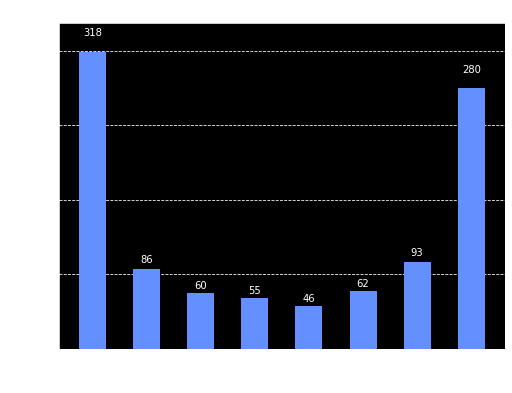

In [31]:
qiskit.visualization.plot_histogram(
    aspen_m3_counts,
    title="3-qubit GHZ on Rigetti Aspen-M-3 topology",
    figsize=(8, 6))